In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [6]:
df = pd.read_csv("/Users/zihan/customer-churn-prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.iloc[202:251]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
202,3363-DTIVD,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Electronic check,105.55,7405.5,No
203,7018-WBJNK,Male,0,No,Yes,13,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),78.30,1033.95,No
204,9142-KZXOP,Male,0,No,No,44,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),68.85,2958.95,No
205,7674-YTAFD,Female,0,No,No,33,Yes,No,Fiber optic,No,...,No,Yes,No,No,One year,Yes,Bank transfer (automatic),79.95,2684.85,No
206,6348-SNFUS,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),55.45,4179.2,No
207,1285-OKIPP,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,79.90,79.9,Yes
208,7825-ECJRF,Female,0,No,No,19,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.60,1934.45,Yes
209,1347-KTTTA,Male,0,Yes,No,64,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),102.45,6654.1,No
210,7841-TZDMQ,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),46.00,84.5,Yes
211,4195-NZGTA,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25.25,25.25,No


In [7]:
new_df = df.drop(index=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754])

print(new_df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [8]:
new_df.iloc[1:7043]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


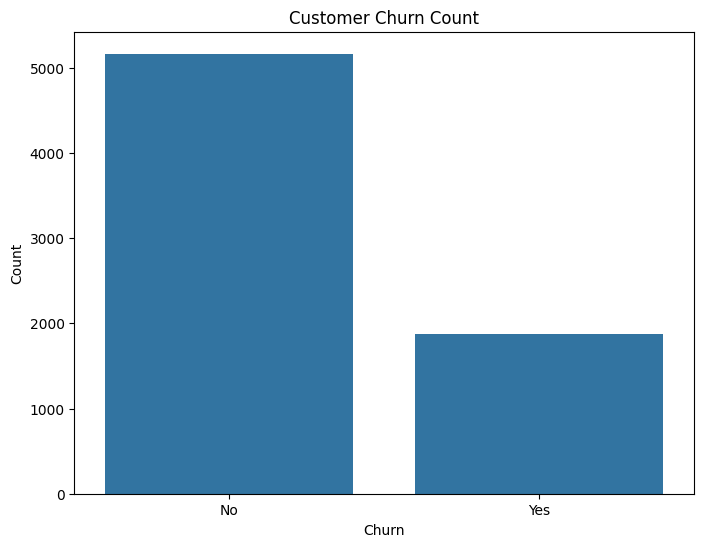

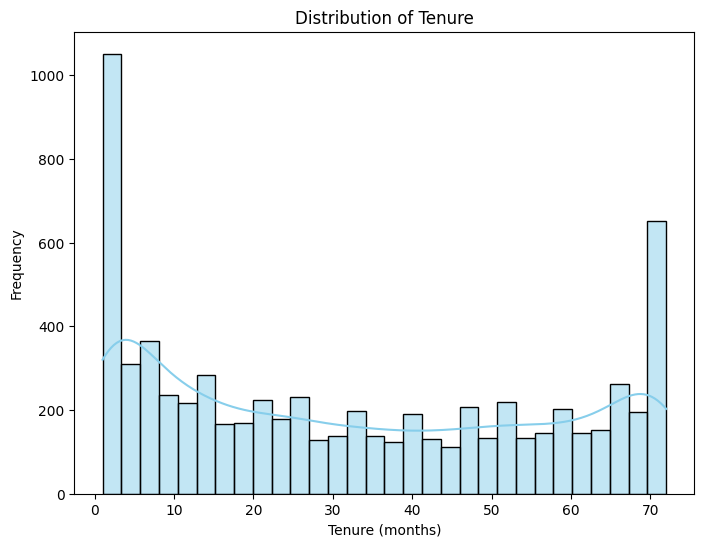

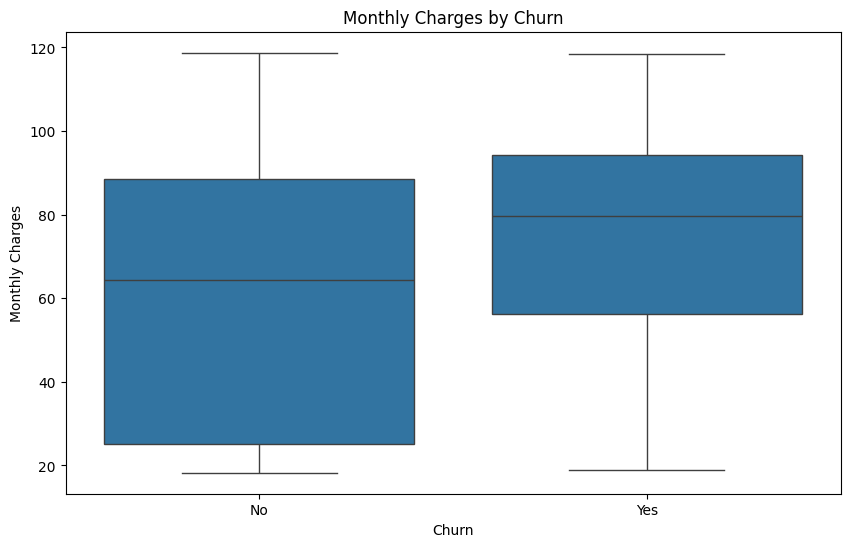

In [10]:
# --- Visualization 1: Count Plot for Customer Churn ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=new_df)
plt.title("Customer Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# --- Visualization 2: Distribution Plot for 'Tenure' Feature ---
plt.figure(figsize=(8, 6))
sns.histplot(new_df['tenure'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.show()

# --- Visualization 3: Boxplot of Monthly Charges vs. Churn ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=new_df)
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

In [17]:
categorical_columns = new_df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(new_df[categorical_columns])


one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))


df_encoded = pd.concat([df, one_hot_df], axis=1)

print(new_df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape